In [108]:
#%matplotlib notebook
%matplotlib inline

In [109]:
# import dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

In [110]:
# Import the WHO dataset, drop missing data
meta_data = pd.read_csv('/Users/russ/Downloads/Mouse_metadata.csv')
study_data = pd.read_csv('/Users/russ/Downloads/Study_results.csv')

# merge the two dataframes
cancer_data_df = pd.merge(meta_data, study_data, on = 'Mouse ID', how = 'left')

# data cleansing
# drop all the missing data if there is any
cancer_data_df.dropna()
# check the dataframe details i.e column counts and dtype among others
cancer_data_df.value_counts()
# drop all duplicate data with same timpoint and mouse ID
cancer_data=cancer_data_df.drop_duplicates(subset=['Timepoint','Mouse ID'])
# check the residual data in this case 4 rows of duplicates were removed 
# cleaned data is vital in getting accurate insights 
cancer_data.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
a203      Infubinol     Female  20          23          0          45.000000           0                   1
q597      Ramicane      Male    20          25          40         44.471821           2                   1
q633      Zoniferol     Male    12          25          10         49.001866           0                   1
                                                        5          47.183802           0                   1
                                                        0          45.000000           0                   1
                                                                                                          ..
i334      Ramicane      Female  8           20          5          41.020518           0                   1
                                                        0          45.000000           0                   1
i177      Ramicane      

In [111]:
# calculate summary statistics mean, median, variance, standard deviation and SEM
# use aggregate function to create a summary stat table
# sourced from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
# group the data by drug regimen 
regimen1_data = cancer_data.groupby('Drug Regimen')
regimen_data = regimen1_data.aggregate(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
regimen_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [112]:
# as grouped earlier, add count for ease of plotting
# set the grouped series to a dataframe to use plot function
regimen1_data = cancer_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
reg = pd.DataFrame(regimen1_data)
reg

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


Text(0, 0.5, 'count of mise used in (hundreds)')

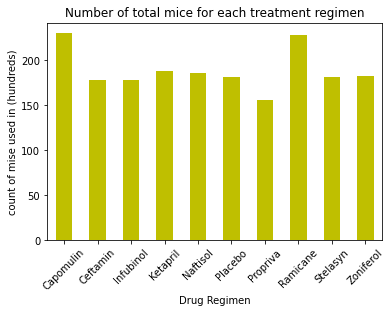

In [113]:
# plot the dataframe using the plot function
reg.plot.bar(legend=False,rot=45,color= 'y',align= 'center')
plt.title('Number of total mice for each treatment regimen')
plt.xlabel('Drug Regimen')
plt.ylabel("count of mise used in (hundreds)")

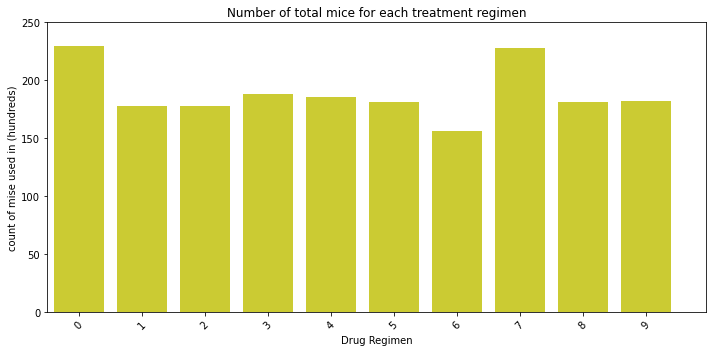

In [114]:
# Set x axis and tick locations
x_axis = np.arange(len(reg))

tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
plt.bar(x_axis, reg['Tumor Volume (mm3)'], color='y', alpha=0.8)
plt.xticks(tick_locations, rotation="45")
plt.tight_layout()

# Set x and y limits
plt.xlim(-.5, len(x_axis)-.05)
plt.ylim(0, 250)

# Set a Title and labels
plt.title('Number of total mice for each treatment regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('count of mise used in (hundreds)')

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("/Users/russ/Desktop/matplotlib_challenge")
plt.show()

In [115]:
sex = cancer_data.groupby('Sex').count()
sex

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,930,930,930,930,930,930,930
Male,958,958,958,958,958,958,958


In [116]:
labels = list(sex.index)
labels

['Female', 'Male']

In [117]:
sizes = sex['Mouse ID']
sizes

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

([<matplotlib.patches.Wedge at 0x7fefc7275210>,
 [Text(-0.7265028750894216, -0.8259501029038041, 'Female'),
  Text(0.726502952420448, 0.8259500348836922, 'Male')],
 [Text(-0.39627429550332083, -0.45051823794752943, '49.3%'),
  Text(0.3962743376838807, 0.4505182008456502, '50.7%')])

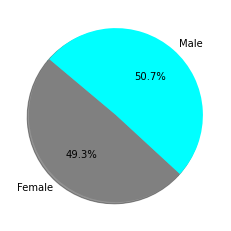

In [118]:
# labels for the sections of pie chart
labels = list(sex.index)
# values for each section of the pie chart
sizes = sex['Mouse ID']
# color of the pie chart section
colors = ['grey','cyan']

# plot the pie chart
plt.pie(sizes, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)

<AxesSubplot:ylabel='Mouse ID'>

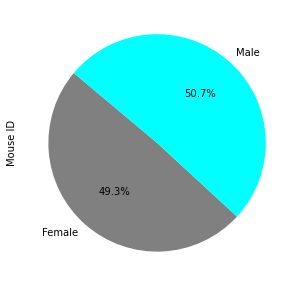

In [119]:
colors = ['grey','cyan']
sexpie = sex['Mouse ID'].plot.pie(y='sizes', figsize=(5, 5), colors=colors, autopct="%1.1f%%",startangle=140)
sexpie

In [120]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin#
capomulin = cancer_data.groupby(['Drug Regimen']).get_group(('Capomulin'))

# Start by getting the last (greatest) timepoint for each mouse
capomulin_df = pd.DataFrame(capomulin.groupby(['Mouse ID']).max()['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_final = pd.merge(capomulin_df, cancer_data, on = 'Mouse ID', how = 'outer')
capomulin_final.head()

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,b128,45.0,Capomulin,Female,9,22,0,45.000000,0
1,b128,45.0,Capomulin,Female,9,22,5,45.651331,0
2,b128,45.0,Capomulin,Female,9,22,10,43.270852,0
3,b128,45.0,Capomulin,Female,9,22,15,43.784893,0
4,b128,45.0,Capomulin,Female,9,22,20,42.731552,0


In [121]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens
tumorVol_capomulin = capomulin_final['Tumor Volume (mm3)']

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = tumorVol_capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume  is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume  is: 45.0
The upper quartile of tumor volume is: 56.32407510749999
The interquartile range of tumor volume is: 11.324075107499993
The the median of tumor volume is: 48.951421075 
Values below 28.01388733875001 could be outliers.
Values above 73.31018776874998 could be outliers.


In [122]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin#
ramicane = cancer_data.groupby(['Drug Regimen']).get_group(('Ramicane'))

# Start by getting the last (greatest) timepoint for each mouse
ramicane_df = pd.DataFrame(ramicane.groupby(['Mouse ID']).max()['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ramicane_final = pd.merge(ramicane_df, cancer_data, on = 'Mouse ID', how = 'outer')
ramicane_final.head()

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a411,45.0,Ramicane,Male,3,22,0,45.000000,0
1,a411,45.0,Ramicane,Male,3,22,5,45.466677,0
2,a411,45.0,Ramicane,Male,3,22,10,40.759788,1
3,a411,45.0,Ramicane,Male,3,22,15,41.484169,1
4,a411,45.0,Ramicane,Male,3,22,20,38.087373,1


In [123]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens
tumorVol_ramicane = ramicane_final['Tumor Volume (mm3)']

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = tumorVol_ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume  is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume  is: 45.0
The upper quartile of tumor volume is: 56.32407510749999
The interquartile range of tumor volume is: 11.324075107499993
The the median of tumor volume is: 48.951421075 
Values below 28.01388733875001 could be outliers.
Values above 73.31018776874998 could be outliers.


In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin#
infubinol = cancer_data.groupby(['Drug Regimen']).get_group(('Infubinol'))

# Start by getting the last (greatest) timepoint for each mouse
infubinol_df = pd.DataFrame(infubinol.groupby(['Mouse ID']).max()['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
infubinol_final = pd.merge(infubinol_df, cancer_data, on = 'Mouse ID', how = 'outer')
infubinol_final.head()

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45.0,Infubinol,Female,20,23,0,45.000000,0
1,a203,45.0,Infubinol,Female,20,23,5,48.508468,0
2,a203,45.0,Infubinol,Female,20,23,10,51.852437,1
3,a203,45.0,Infubinol,Female,20,23,15,52.777870,1
4,a203,45.0,Infubinol,Female,20,23,20,55.173336,1


In [125]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens
tumorVol_infubinol = infubinol_final['Tumor Volume (mm3)']

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = tumorVol_infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume  is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume  is: 45.0
The upper quartile of tumor volume is: 56.32407510749999
The interquartile range of tumor volume is: 11.324075107499993
The the median of tumor volume is: 48.951421075 
Values below 28.01388733875001 could be outliers.
Values above 73.31018776874998 could be outliers.


In [126]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin#
ceftamin = cancer_data.groupby(['Drug Regimen']).get_group(('Ceftamin'))

# Start by getting the last (greatest) timepoint for each mouse
ceftamin_df = pd.DataFrame(ceftamin.groupby(['Mouse ID']).max()['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceftamin_final = pd.merge(ceftamin_df, cancer_data, on = 'Mouse ID', how = 'outer')
ceftamin_final.head()

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a275,45.0,Ceftamin,Female,20,28,0,45.000000,0
1,a275,45.0,Ceftamin,Female,20,28,5,46.795257,0
2,a275,45.0,Ceftamin,Female,20,28,10,47.371343,0
3,a275,45.0,Ceftamin,Female,20,28,15,49.734404,0
4,a275,45.0,Ceftamin,Female,20,28,20,50.513437,1


In [127]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens
tumorVol_ceftamin = ceftamin_final['Tumor Volume (mm3)']

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = tumorVol_ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume  is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume  is: 45.0
The upper quartile of tumor volume is: 56.32407510749999
The interquartile range of tumor volume is: 11.324075107499993
The the median of tumor volume is: 48.951421075 
Values below 28.01388733875001 could be outliers.
Values above 73.31018776874998 could be outliers.
